# Exercises: Linear Correlation Analysis

## Lecture Link : 
https://www.quantopian.com/lectures/linear-correlation-analysis

### IMPORTANT NOTE: 
This lecture corresponds to the Linear Correlation Analysis lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

## Key Concepts

In [1]:
# Useful Functions
def find_most_correlated(data):
    n = data.shape[1]
    keys = data.keys()
    pair = []
    max_value = 0
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = np.corrcoef(S1, S2)[0,1]
            if result > max_value:
                pair = (keys[i], keys[j])
                max_value = result
    return pair, max_value

In [20]:
# Replacement of quantopian function for YahooFinance function
def get_pricing(ticker, fields=['close'], start_date='2005-01-01', end_date='2010-01-01'):
    fields = fields + ['formatted_date']
    yf = YahooFinancials(ticker)
    ticker_price_info = yf.get_historical_price_data(start_date, end_date, 'daily')
    p = pd.DataFrame(ticker_price_info[ticker]['prices'])[fields]
    p['formatted_date'] = pd.to_datetime(p['formatted_date'])
    p.set_index('formatted_date', inplace=True)
    p.columns = [f'{ticker}_{f}' for f in p.columns]
    return p   

In [2]:
# Useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

---

# Exercise 1: Dependence of Artificial Variables

## a. Finding Variance, Covariance, and Correlation I

By reading the matrix output from the `np.cov()` and `np.corrcoef()` functions, find the variance of the variables $A$ and $B$ and the covariance and correlation of their relationship. 

In [3]:
A = np.random.rand(100)
B = -3 * A + np.random.exponential(0.05, 100)

#Your code goes here

In [4]:
print(f'Variance of [A,B] respectively = {np.diag(np.cov(A,B))}')

Variance of [A,B] respectively = [0.08387068 0.77517585]


In [5]:
print(f'Cov = {np.cov(A,B)[1,0]}')

Cov = -0.2546992034894273


In [6]:
print(f'Corr = {np.corrcoef(A,B)[1,0]}')

Corr = -0.9989008480752032


## b. Finding Variance, Covariance, and Correlation II

By reading the matrix output from the `np.cov()` and `np.corrcoef()` functions, find the variance of the variables $C$ and $D$ and the covariance and correlation of their relationship. 

In [7]:
C = np.random.rand(100)
D = np.random.normal(0, 0.5, 100)

#Your code goes here

In [8]:
covm = np.cov(C,D)
corrm = np.corrcoef(C,D)

In [9]:
print(f'Variance of C,D respectively = {np.diag(covm)}')

Variance of C,D respectively = [0.08216273 0.17659499]


In [10]:
print(f'Cov = {covm[1,0]}')

Cov = 0.00559656271182745


In [11]:
print(f'Corr = {corrm[1,0]}')

Corr = 0.046461663101939096


In [12]:
covm

array([[0.08216273, 0.00559656],
       [0.00559656, 0.17659499]])

In [13]:
corrm

array([[1.        , 0.04646166],
       [0.04646166, 1.        ]])

----

# Exercise 2: Constructing Example Relationships

## a. Positive Correlation Example

Construct a variable $Y$ which has a strong, but not perfect, positive correlation with $X$ $(0.9 < Corr(X,Y) < 1)$, and plot their relationship.

In [14]:
X = np.random.rand(100)

#Your code goes here

In [15]:
Y = X+np.random.normal(0,0.1,100)
np.corrcoef(X,Y)

array([[1.        , 0.95509991],
       [0.95509991, 1.        ]])

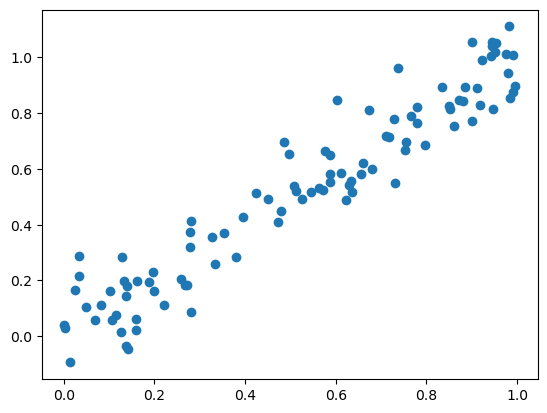

In [16]:
plt.scatter(X,Y)

## b. Negative Correlation Example

Construct a variable $W$ which has a weak, negative correlation with $Z$ $(-0.3 < Corr(Z,W) < 0)$, and plot their relationship.

In [17]:
Z = np.random.rand(100)

#Your code goes here
W = -Z+np.random.normal(0,1,100)

np.corrcoef(W,Z)

array([[ 1.        , -0.33571936],
       [-0.33571936,  1.        ]])

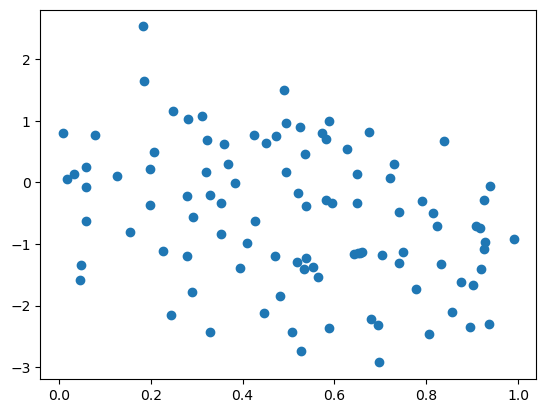

In [18]:
plt.scatter(Z,W)

----

# Exercise 3: Correlation of Real Assets

## a. Finding Correlation of Real Assets

Find the correlation between the stocks OKE and LAKE. Also check how they correlate with the provided benchmark.

In [22]:
OKE = get_pricing('OKE', fields=['close'], start_date='2013-01-01', end_date='2015-01-01')
LAKE = get_pricing('LAKE', fields=['close'], start_date='2013-01-01', end_date='2015-01-01')
benchmark = get_pricing('SPY', fields=['close'], start_date='2013-01-01', end_date='2015-01-01')

#Your code goes here

In [56]:
corrm = np.corrcoef([OKE.values.flatten(),LAKE.values.flatten(),benchmark.values.flatten()])

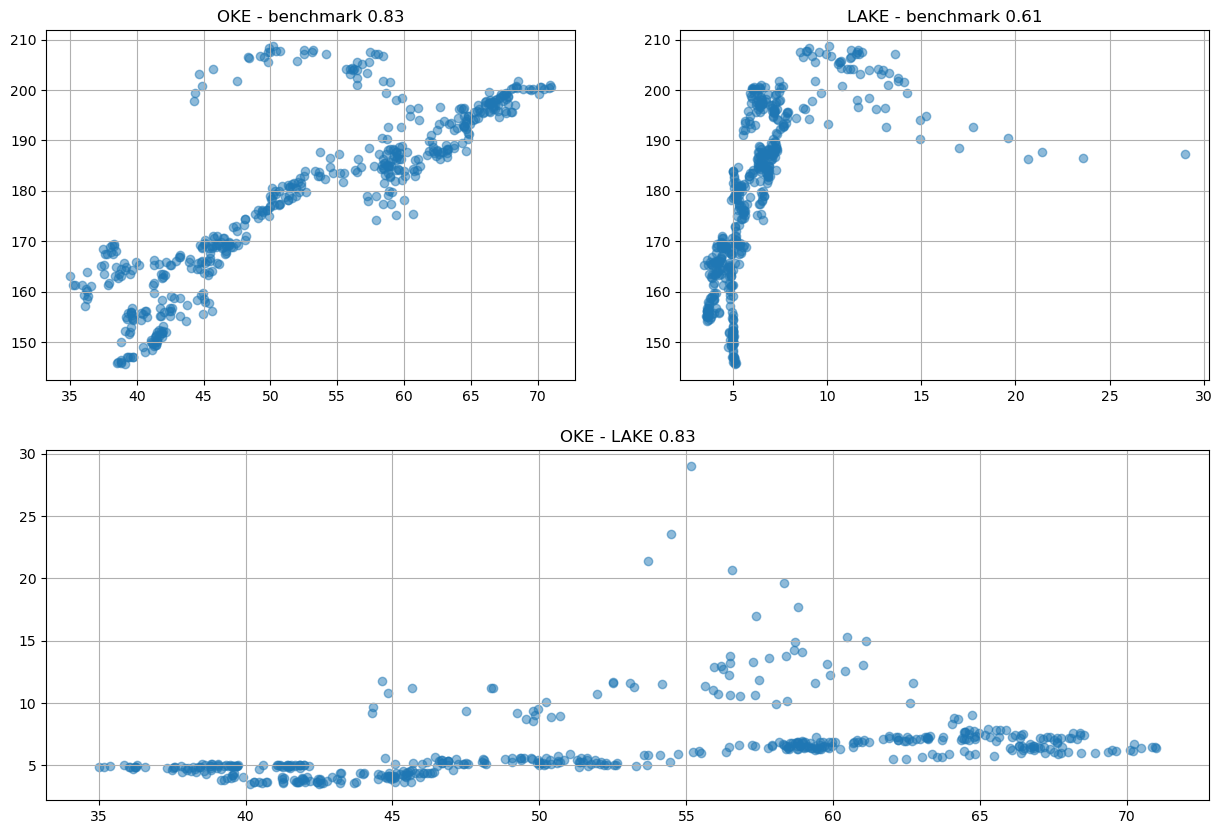

In [57]:
fig = plt.figure(figsize=(15,10))

gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

ax1.scatter(OKE,benchmark, alpha=0.5)
ax1.grid()
ax1.set_title(f'OKE - benchmark {corrm[0,2]:.2F}')
ax2.scatter(LAKE,benchmark, alpha=0.5)
ax2.grid()
ax2.set_title(f'LAKE - benchmark {corrm[1,2]:.2F}')
ax3.scatter(OKE,LAKE, alpha=0.5)
ax3.grid()
ax3.set_title(f'OKE - LAKE {corrm[0,2]:.2F}');

## b. Finding Correlated Pairs

Find the most correlated pair of stocks in the following portfolio using 2015 pricing data and the `find_most_correlated` function defined in the Helper Functions section above.

In [24]:
#symbol_list = ['GSK', 'SNOW', 'META', 'AZO', 'XEC', 'AMZN']
symbol_list = ['GSK', 'META', 'AZO', 'AMZN']

In [26]:
start_date='2015-01-01'
end_date='2016-01-01'
lst = []
for s in symbol_list:
    try:
        price = get_pricing(s,start_date=start_date,end_date=end_date)
        lst.append(price)
    except Exception as e:
        print(f'Error while processing {s}: {e}')

In [27]:
from functools import reduce

In [28]:
dfs = reduce(lambda l,r: pd.merge(l,r, left_index=True, right_index=True),lst)

In [29]:
dfs

,GSK_close,META_close,AZO_close,AMZN_close
formatted_date,,,,
2015-01-02,42.369999,78.449997,616.789978,15.426000
2015-01-05,41.910000,77.190002,608.489990,15.109500
2015-01-06,41.680000,76.150002,607.820007,14.764500
2015-01-07,42.110001,76.150002,607.239990,14.921000
2015-01-08,43.189999,78.180000,606.000000,15.023000
...,...,...,...,...
2015-12-24,40.930000,105.019997,740.559998,33.139500
2015-12-28,40.919998,105.930000,741.869995,33.759998
2015-12-29,41.189999,107.260002,749.179993,34.698502


In [30]:
find_most_correlated(dfs)

(('META_close', 'AMZN_close'), 0.9575381905117571)

In [31]:
dfs.columns

Index(['GSK_close', 'META_close', 'AZO_close', 'AMZN_close'], dtype='object')

In [32]:
corrm = np.corrcoef(dfs.values,rowvar=False)

In [33]:
corrm

array([[ 1.        , -0.65124765, -0.57705586, -0.67908167],
       [-0.65124765,  1.        ,  0.88133577,  0.95753819],
       [-0.57705586,  0.88133577,  1.        ,  0.91570318],
       [-0.67908167,  0.95753819,  0.91570318,  1.        ]])

In [34]:
# Triangle indices
ti = np.triu_indices_from(corrm,k=1)

In [35]:
# Max correlation index
mci = np.argmax(corrm[ti])

In [36]:
# Max arg triangle indices
mati_r, mati_c = (ti[0][mci],ti[1][mci])
dfs.columns[mati_r],dfs.columns[mati_c],corrm[mati_r,mati_c]

('META_close', 'AMZN_close', 0.9575381905117571)

----

# Exercise 4: Limitations of Correlation

## a. Out of Sample Tests

Using pricing data from the first half of 2016, find the correlation coefficient between FB and AMZN and compare it to the strong positive relationship predicted from the 2015 correlation coefficient to see if that result holds.

In [58]:
FB_15 = get_pricing('META', start_date='2015-01-01', end_date='2016-01-01')
AMZN_15 = get_pricing('AMZN', start_date='2015-01-01', end_date='2016-01-01')
FB_16 = get_pricing('META', start_date='2016-01-01', end_date='2016-07-01')
AMZN_16 = get_pricing('AMZN', start_date='2016-01-01', end_date='2016-07-01')

#Your code goes here

In [73]:
np.corrcoef(FB_15,AMZN_15,rowvar=False)

array([[1.        , 0.95753819],
       [0.95753819, 1.        ]])

In [74]:
np.corrcoef(FB_16,AMZN_16,rowvar=False)

array([[1.        , 0.65120761],
       [0.65120761, 1.        ]])

## b. Rolling Correlation

Plot the 60-day rolling correlation coefficient between FB and AMZN to make a conclusion about the stability of their relationship.

In [75]:
FB = get_pricing('META',  start_date='2015-01-01', end_date='2017-01-01')
AMZN = get_pricing('AMZN',  start_date='2015-01-01', end_date='2017-01-01')

#Your code goes here

In [79]:
prices = pd.merge(left=FB,right=AMZN,left_index=True,right_index=True)

In [111]:
prices_roll = prices.rolling(window=60).corr()

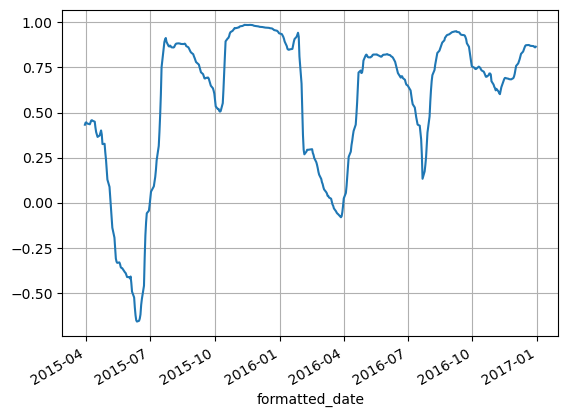

In [117]:
prices_roll.unstack(level=1)['META_close']['AMZN_close'].plot()
plt.grid()

Congratulations on completing the Linear Correlation Analysis exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*